

IMPORTING LIBRARIES

In [ ]:
#for data analysis purposes use import libraries
import pandas as pd 
import numpy as np              
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

In [ ]:
#Needed for Linear Regression, Polinomial Regression, Ridge Regression, and Lasso Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, Lars
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

In [ ]:
#Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Link newFlight_Regg.csv to newFlights_Regg
newFlights_Regg = pd.read_csv('/content/drive/My Drive/BigDataProject_Group_1/BiggerAirline.csv')


In [ ]:
# counts the number of rows that have 0s and 1s in DEP_DELAY
newFlights_Regg.DEP_DELAY.value_counts()

0    9172336
1    3325077
Name: DEP_DELAY, dtype: int64

FUNCTION TO MAKE CONFUSION MATRIX
Function Retrived From : https://www.kaggle.com/agungor2/various-confusion-matrix-plots

In [ ]:
from sklearn.metrics import confusion_matrix

def plot_cm(y_true, y_pred, figsize=(10,10)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)

In [ ]:
#head() displayes the first 5 rows of the dataset
newFlights_Regg.head()

,Unnamed: 0,DEP_DELAY,TAXI_OUT,TAXI_IN,ARR_DELAY,SCHEDULED_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE
0,0,0,15.0,7.0,0,63.0,62.0,177.0
1,1,1,20.0,9.0,0,194.0,179.0,1076.0
2,2,1,19.0,10.0,1,57.0,61.0,177.0
3,3,1,8.0,4.0,0,196.0,176.0,1222.0
4,4,0,15.0,10.0,0,152.0,140.0,925.0


In [ ]:
#Trying with more features, not just 'DISTANCE'
features = ['SCHEDULED_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME', 'ARR_DELAY', 'DISTANCE','TAXI_OUT','TAXI_IN']

In [ ]:
# split the data into train and test
# using random seed of 3333
np.random.seed(3333)
train = newFlights_Regg.sample(frac=0.8, random_state=3333)
test = pd.concat([newFlights_Regg, train]).drop_duplicates(keep=False)

LINEAR REGRESSION

In [ ]:
linearRegression = LinearRegression(normalize=True).fit(train[features], train[['DEP_DELAY']])
print("Training Score: ", linearRegression.score(train[features], train[['DEP_DELAY']]))
print("Testing Score: ", linearRegression.score(test[features], test[['DEP_DELAY']]))
print("Mean Squared Error: ", mean_squared_error(test['DEP_DELAY'], linearRegression.predict(test[features])))
print("Root Mean Squared Error: ", sqrt(mean_squared_error(test['DEP_DELAY'], linearRegression.predict(test[features]))))
print("Mean Absolute Error: ", mean_absolute_error(test['DEP_DELAY'], linearRegression.predict(test[features])))

Training Score:  0.4975384849968286
Testing Score:  0.49874159840609145
Mean Squared Error:  0.09792487222863695
Root Mean Squared Error:  0.3129295004128517
Mean Absolute Error:  0.20713186974807177


RIDGE REGRESSION

In [ ]:
ridgeRegression = Ridge(normalize=True).fit(train[features], train[['DEP_DELAY']])
print("Training Score: ", ridgeRegression.score(train[features], train[['DEP_DELAY']]))
print("Testing Score: ", ridgeRegression.score(test[features], test[['DEP_DELAY']]))
print("Mean Squared Error: ", mean_squared_error(test['DEP_DELAY'], ridgeRegression.predict(test[features])))
print("Root Mean Squared Error: ", sqrt(mean_squared_error(test['DEP_DELAY'], ridgeRegression.predict(test[features]))))
print("Mean Absolute Error: ", mean_absolute_error(test['DEP_DELAY'], ridgeRegression.predict(test[features])))

Training Score:  0.32247178576607916
Testing Score:  0.323015866827571
Mean Squared Error:  0.13225431141088784
Root Mean Squared Error:  0.3636678586442412
Mean Absolute Error:  0.30727183904011535


LASSO REGRESSION

In [ ]:
lassoRegression = Lasso(normalize=True).fit(train[features], train[['DEP_DELAY']])
print("Training Score: ", lassoRegression.score(train[features], train[['DEP_DELAY']]))
print("Testing Score: ", lassoRegression.score(test[features], test[['DEP_DELAY']]))
print("Mean Squared Error: ", mean_squared_error(test['DEP_DELAY'], lassoRegression.predict(test[features])))
print("Root Mean Squared Error: ", sqrt(mean_squared_error(test['DEP_DELAY'], lassoRegression.predict(test[features]))))
print("Mean Absolute Error: ", mean_absolute_error(test['DEP_DELAY'], lassoRegression.predict(test[features])))

Training Score:  0.0
Testing Score:  -2.6678270836910656e-07
Mean Squared Error:  0.1953581187705116
Root Mean Squared Error:  0.44199334697539466
Mean Absolute Error:  0.3906094030521321


In [ ]:
#Since No of Delayed attribues and No of Non-Delayed attributes are not equal we are going to split the dataset into two and then make the no. of Non-Delayed attributes same as the Delayed
DelayedFlights=newFlights_Regg.loc[newFlights_Regg['DEP_DELAY']==1]
Non_DelayedFlights=newFlights_Regg.loc[newFlights_Regg['DEP_DELAY']==0]

In [ ]:
#len() shows no. of rows in the dataset 
len(DelayedFlights)

3325077

In [ ]:
#Re-adjusted the Non_DelayedFlights so that it has almost equal no. of rows as DelayedFlights 
Non_DelayedFlights=Non_DelayedFlights.sample(frac=1)
Non_DelayedFlights =Non_DelayedFlights.iloc[:4500000]

In [ ]:
DelayedFlights=DelayedFlights.sample(frac=1)
DelayedFlights= DelayedFlights.iloc[:1500000]

In [ ]:
#Joining the previously seperated datasets
frames=[DelayedFlights,Non_DelayedFlights]
DF=pd.concat(frames)

In [ ]:
#len() shows no. of rows in the dataset
len(DF)

6000000

SPLITTING THE DATASET FOR LOGISTIC REGRESSION PURPOSE

In [ ]:
# split the data into train and test
# using random seed of 3333
np.random.seed(3333)
train = DF.sample(frac=0.8, random_state=3333)
test = pd.concat([DF, train]).drop_duplicates(keep=False)

LOGISTIC REGRESSION

In [ ]:
#Import libraries for logistic regression, cross validation, kfold
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import  classification_report

In [ ]:
#to avoid overfitting we are using stratifiedKFold
kfold = StratifiedKFold(n_splits=3)

In [ ]:
#Logistic Regression Model with target variable DEP_DELAY and other attributes are used to train it
lregg_model = LogisticRegressionCV(cv=kfold,class_weight='balanced',random_state=888)
lregg_model.fit(train[features], train[['DEP_DELAY']])

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV(Cs=10, class_weight='balanced',
                     cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=False),
                     dual=False, fit_intercept=True, intercept_scaling=1.0,
                     l1_ratios=None, max_iter=100, multi_class='auto',
                     n_jobs=None, penalty='l2', random_state=888, refit=True,
                     scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [ ]:
#predicting on test data
predict_lregg=lregg_model.predict(test[features])

In [ ]:
#printing classification report
print(classification_report(test['DEP_DELAY'], predict_lregg))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90    900120
           1       0.69      0.75      0.72    299880

    accuracy                           0.85   1200000
   macro avg       0.80      0.82      0.81   1200000
weighted avg       0.86      0.85      0.86   1200000



In [ ]:
#calculating accuracy on cross validation
accuracy_lregg=cross_val_score(lregg_model,test[features],test['DEP_DELAY'],cv=kfold,scoring='accuracy')

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
 print('Mean Accuracy: %s' % accuracy_lregg.mean())

Mean Accuracy: 0.857225


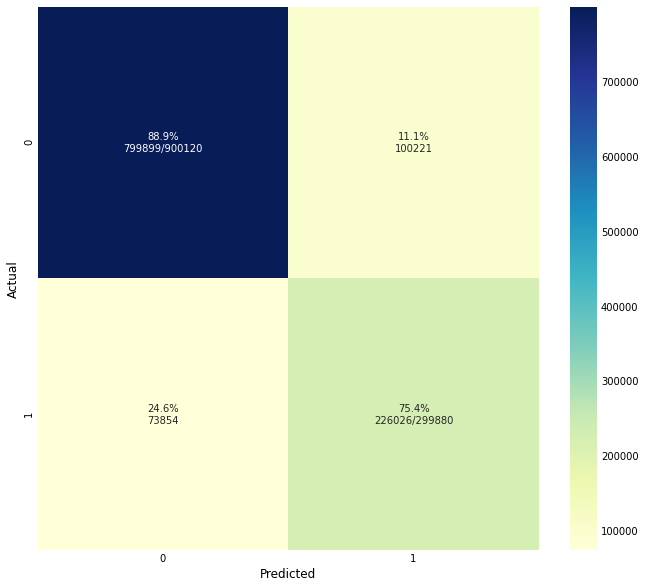

In [ ]:
#making confusion matrix
plot_cm(test["DEP_DELAY"],predict_lregg)

SVM CLASSIFYER

In [ ]:
#now we are going to use SVC classifyer for DEP_DELAY and metrics from sklearn
from sklearn.svm import SVC
from sklearn import metrics

In [ ]:
#making classifyer with hyperparameter of max_iter=100
clsfyer = SVC(kernel='rbf',max_iter=100)

In [ ]:
#fitting the data 
clsfyer.fit(train[features],train["DEP_DELAY"])

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=100, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# predicting the test set results
clsfyer_predictoer=clsfyer.predict(test[features])


In [ ]:
 #printing the accuracy
print("Accuracy:", metrics.accuracy_score(test["DEP_DELAY"], clsfyer_predictoer))

Accuracy: 0.7177641666666666


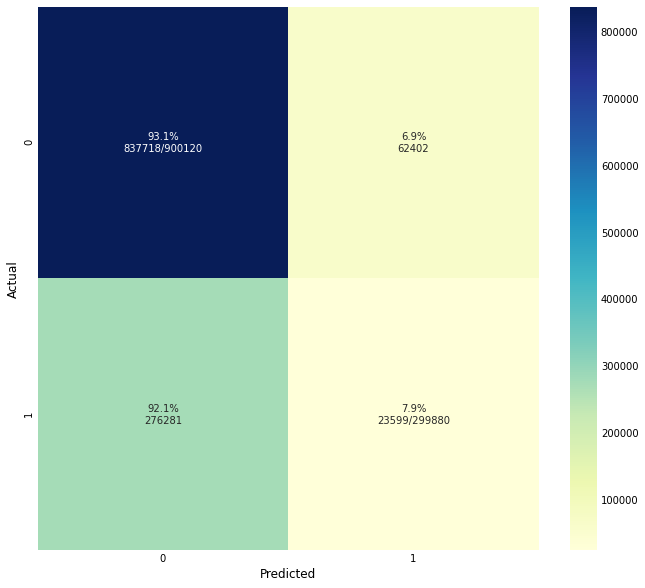

In [ ]:
#CONFUSION MATRIX
plot_cm(test["DEP_DELAY"],clsfyer_predictoer)

RANDOM FOREST CLASSIFIER

In [ ]:
#Import library for Random forest Classifier.
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [ ]:
# SCALING THE INPUT
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
train[features] = sc_X.fit_transform(train[features])
test[features] = sc_X.transform(test[features])

In [ ]:
# making the Random Forest Classifier
RFC=RandomForestClassifier()

In [ ]:
#Fitting the data
RFC.fit(train[features],train["DEP_DELAY"])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# predicting the test set results
rfc_predictoer=RFC.predict(test[features])

In [ ]:
#printing the accuracy
print("Accuracy:",metrics.accuracy_score(test["DEP_DELAY"], rfc_predictoer)) 

Accuracy: 0.8125


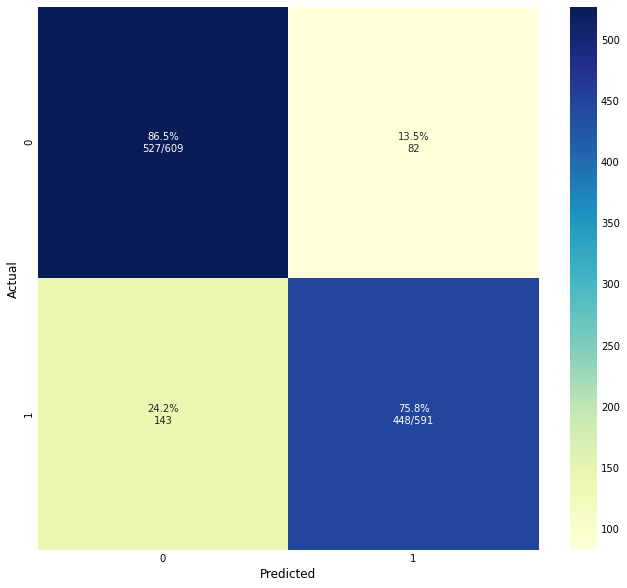

In [ ]:
#plotting Confusion Matrix
    
plot_cm(test['DEP_DELAY'],rfc_predictoer)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(train[features],train["DEP_DELAY"])

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 23.1min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 400}

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 20, 30, 40],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [4, 8, 10],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# Fit the grid search to the data
grid_search.fit(train[features],train["DEP_DELAY"])
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   45.8s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 16.2min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 22.1min finished


{'bootstrap': True,
 'max_depth': 10,
 'max_features': 2,
 'min_samples_leaf': 4,
 'min_samples_split': 8,
 'n_estimators': 1000}

In [ ]:
RFC_1=RandomForestClassifier(bootstrap=True,
 max_depth = 10,
 max_features= 2,
 min_samples_leaf= 4,
 min_samples_split= 2,
 n_estimators= 400)

In [ ]:
RFC_1.fit(train[features],train["DEP_DELAY"])

In [ ]:
print("Accuracy:",metrics.accuracy_score(test["DEP_DELAY"], RFC_1.predict(test[features]))) 

Accuracy: 0.862015


RANDOME FOREST REGRESSOR GOT 86%

In [ ]:
#plotting Confusion Matrix
    
plot_cm(test['DEP_DELAY'], RFC_1.predict(test[features]))